# ADS Lab 1 - Investigating Data Structures

In the lecture we talked about the Python list data structure as well as dictionaries, hash tables and binary search trees.  Here we will be looking at simple operations on (long) lists and investigating how algorithmic choices impact run time.

In order to do this we will be creating and processing lists of random numbers.  We can easily generate random numbers in Python using the *random* library.

In [16]:
import random

startno=1
endno=1000

#random.randint(a,b) returns a (pseudo-)random integer between a and b inclusive
a=random.randint(startno,endno)
print(a)

145


### Exercise 1.
Remember, if you have list *list1* you can add another *item* to the end by calling *list1.append(item)*

Write a function *make_rand_list1(n)* which returns a list of *n* random integers (between 1 and 100).  This function should use the **append** method for lists as described above.

In [18]:
import random

def make_rand_list1(m,n=1):
    out = []
    for i in range(0,m,n):
        out.append(random.randint(1,100))
        
    return out

In [28]:
def rl(n):
    return [random.randint(0,100) for x in range(n)]

In [29]:
rl(10)

[3, 5, 33, 13, 78, 77, 94, 18, 95, 48]

In [27]:
make_rand_list1(10)

[18, 29, 73, 31, 74, 11, 99, 48, 92, 46]

## Keyword Arguments to Functions
There are 2 ways of supplying arguments to functions in Python - by position and by name.

In [116]:
def myfunc(a,b):
    '''
    myfunc() has 2 positional arguments.  
    They have to be supplied each time the function is called.
    They have to be supplied in the correct order
    '''
    
    x=0
    for i in range(100000):
        x+=a*i/b*(i+1) 
    
    return x


In [117]:
myfunc(2,10)

66666666659988.75

In [118]:
myfunc(10,2)

1666666666500000.0

In [119]:
myfunc(20)

TypeError: myfunc() missing 1 required positional argument: 'b'

However, sometimes we want to make arguments optional or supply default values.  We can do this using named or keyword arguments

In [120]:
def myfunc2(numerator=10,denominator=2):
    '''
    If no values are supplied at run-time then numerator will be 10 and denominator will be 2
    '''
    
    x=0
    for i in range(100000):
        x+=numerator*i/denominator*(i+1) 
    
    return x

In [121]:
myfunc2()

1666666666500000.0

In [122]:
myfunc2(denominator=10,numerator=2) #we can give named arguments in any order provided we use the names

66666666659988.75

In [123]:
myfunc2(30,2) #no names given so default ordering is assumed

4999999999500000.0

In [124]:
myfunc2(30)

4999999999500000.0

### Exercise 2
Modify your code in exercise 1 so that it takes two optional keyword arguments that define the start and end of the range which the random numbers are selected from.

In [126]:
import random

def make_rand_list2(start,end,step=1):
    out = []
    for i in range(0,101,step):
        out.append(random.randint(start,end))
        
    return out

In [127]:
make_rand_list2(1,10)

[9,
 3,
 2,
 6,
 3,
 5,
 9,
 3,
 2,
 9,
 6,
 7,
 1,
 4,
 3,
 8,
 8,
 3,
 10,
 5,
 2,
 9,
 7,
 3,
 6,
 7,
 9,
 7,
 2,
 10,
 10,
 5,
 4,
 1,
 9,
 10,
 8,
 8,
 6,
 10,
 7,
 5,
 4,
 1,
 9,
 3,
 8,
 3,
 3,
 6,
 7,
 5,
 7,
 3,
 9,
 1,
 5,
 1,
 3,
 5,
 6,
 1,
 6,
 5,
 9,
 7,
 1,
 8,
 7,
 3,
 8,
 2,
 1,
 7,
 2,
 3,
 4,
 3,
 5,
 7,
 6,
 9,
 7,
 2,
 2,
 9,
 7,
 7,
 2,
 6,
 7,
 3,
 3,
 3,
 2,
 5,
 3,
 4,
 6,
 3,
 8]

### Exercise 3
You may have thought of ways of creating this list which do not use the append method.  For example, you could
* create a list containing a new random number and use list concatenation: [r]+list1
* create a list containing a new random number and use list concatenation: list1 + [r]
* use a list comprehension together with the *range()* function

Can you create Python functions for each of these algorithms (and any others you can think of)?

Which of your functions do you think is the best?  Which do you think will run the fastest?

## Timing Code
We can time how long it takes code to run on the kernel using the *time* library

In [128]:
def list_f1(r,l):
    return [r] + l

import time

starttime=time.time() #start the stopwatch
'''
now put the code you want to time
'''
list_f1(4,[1,2,3])
'''
code being timed completed
'''
endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken)) #.format() can be called on a String for nice formatting (alternative to string concatenation)

Time taken was 0.00010180473327636719s


In [129]:
def list_f2(r,l):
    return l + [r]

starttime=time.time() #start the stopwatch
'''
now put the code you want to time
'''
list_f2(4,[1,2,3])
'''
code being timed completed
'''
endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken)) #.format() can be called on a String for nice formatting (alternative to string concatenation)

Time taken was 9.393692016601562e-05s


In [130]:
def list_f3(start,finish):
    return [x for x in range(start,finish)]


starttime=time.time() #start the stopwatch
'''
now put the code you want to time
'''
list_f3(0,10)
'''
code being timed completed
'''
endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken)) #.format() can be called on a String for nice formatting (alternative to string concatenation)

Time taken was 9.918212890625e-05s


In [131]:
def concat(input_list,*args):
    for i in args:
        input_list += [i]
        
    return input_list


starttime=time.time() #start the stopwatch
'''
now put the code you want to time
'''

concat([],0,1,2,3,4,5,6,7,8,9)

'''
code being timed completed
'''
endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken)) #.format() can be called on a String for nice formatting (alternative to string concatenation)

Time taken was 0.0001437664031982422s


In [148]:
import time

starttime=time.time() #start the stopwatch
'''
now put the code you want to time
'''
x=0
for i in range(10000):
    x+=2**i
'''
code being timed completed
'''
endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken)) #.format() can be called on a String for nice formatting (alternative to string concatenation)

Time taken was 0.08634710311889648s


If you repeatedly run the cell above, you will notice that the times vary (a lot).  This is mainly due to the fact that your computer is doing other things at the same time.   Further, results will vary greatly from one machine to another.  However, by performing a large number of repetitions and taking an average, we can get an idea of how fast a snippet of code will run on the current machine.

Below, there is code for a timeit() function.  This is a higher level function which takes as its first argument a function *somefunc*. This function may have its own positional arguments (\*args) and its own keyword arguments (\*\*kwargs).  These must be passed to *somefunc* when it is called from within timeit() 

In [149]:
import numpy as np

def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

In [160]:
timeit(make_rand_list1,5)

([22, 31, 6, 93, 34], 5.197525024414063e-06, 1.200171751847574e-07)

You could obviously call timeit() on your functions to generate random number lists.  However, it is much more interesting to consider how the amount of time taken relates to the (size of the) input 

### Exercise 4
Write some code to time the running of make_rand_list1(n) where n is a multiple of 10 between 0 and 1000.  Store the values of n in a list called *xs* and the mean times (returned by *timeit()*) in a list called *ys*.
(If you are on a super-fast computer, you can add one or two 0s above to make it take a bit longer.)

In [163]:
import random

def make_rand_list1(m,n=1):
    out = []
    for i in range(0,m,n):
        out.append(random.randint(1,10000))
        
    return out


def time_func(function,*args):
    xs = []
    ys = []
    
    for i in args:
        
        xs.append(i)
        ys.append(timeit(function,i)[1])
        
    return xs, ys
        

In [196]:
(xs, ys) = time_func(make_rand_list1,10,50,100,500,1000,5000,10000,20000,30000,40000,50000)

## Plotting the Results
For a really simple scatterplot of the results, you can use the following code

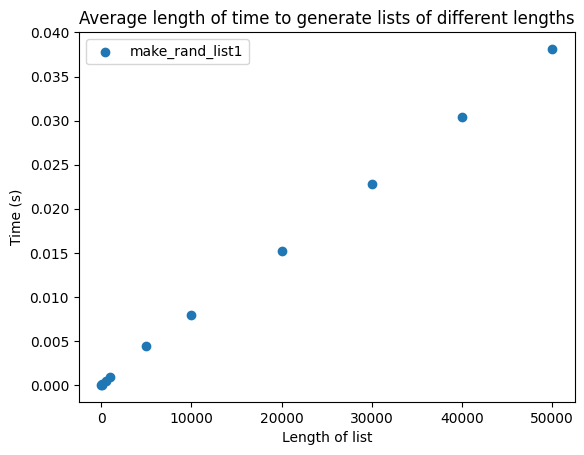

In [335]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.scatter(xs,ys,label='make_rand_list1')
# plt.ylim(0,0.006)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

plt.show()

### Exercise 5
Can you time all of your different functions for making a list of random integers (for varying values of n) and plot the results on the same graph?  What can you conclude about the different algorithms?

## Extension
You can sort any of your lists using the sorted() function.  Investigate how long it takes to find a number in a sorted() list by
1. Checking each item in turn.
2. Using a binary search strategy.  In other words, start in the middle of the list, compare the current item with your target item and move to the left or right accordingly.  Take the middle of that sub-list and so on until the item is found.

To make this more realistic, make the range that your random numbers are selected from much larger than your longest lists (in order to reduce the number of repeated items in the lists). 

In [336]:
def make_rand_list1(m,n=1):
    out = []
    for i in range(0,m,n):
        out.append(random.randint(1,m))
        
    return out


def binary_search(arr,val):
    if len(arr) == 0 or (len(arr) == 1 and val != arr[0]):
        return False
    
    # mid values
    mid = arr[int(len(arr)/2)]
    
    if val == mid: return True
    if val < mid: return binary_search(arr[:int(len(arr)/2)],val)
    if val > mid: return binary_search(arr[int(len(arr)/2+1):],val)
    
    
def find_int(arr,val):
    for i in arr:
        if val == i: return True
    
    else: return False
    
    
def time_func(function,*args):
    xs = []
    ys = []
    
    for i in args:
        arr = list(set(sorted(make_rand_list1(i))))
        
        xs.append(i)
        ys.append(timeit(function,arr,arr[-3])[1])
        
    return xs, ys
        

In [337]:
(xs1, ys1) = time_func(binary_search,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000)

(xs2, ys2) = time_func(find_int,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000)

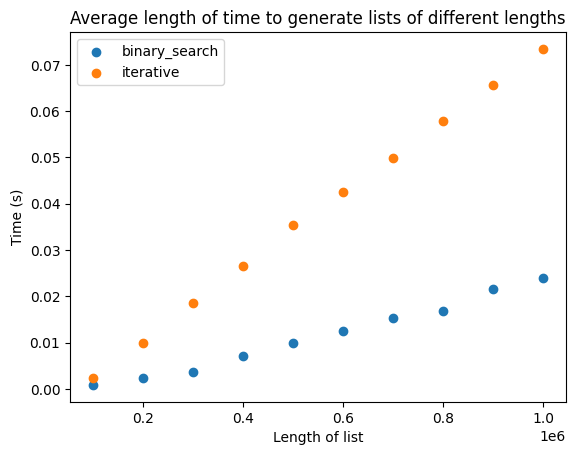

In [339]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.scatter(xs1,ys1,label='binary_search')
# plt.ylim(0,0.006)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')
plt.scatter(xs2,ys2,label='iterative')
plt.legend(loc='upper left')

plt.show()